# Sales Prediction for Big Mart Outlets

### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.
### The aim is to build a predictive model and predict the sales of each product at a particular outlet.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the data
train = pd.read_csv("../input/train_v9rqX0R.csv")
test = pd.read_csv('../input/test_AbJTz2l.csv')

### Understanding The Data

In [3]:
train.shape

(8523, 12)

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

#### Observations :
1. We have 12 coulumns and our target variable is 'Item_Outlet_Sales'.
2. There are 7 categorical features.
3. 'Outlet_Size' and 'Item_Weight' contains missing values.

### EDA

In [8]:
# Before we go for EDA, listing numerical (continuous) , categorical and target features :
conti = ['Item_Weight', 'Item_Visibility','Item_MRP']
categ = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year',
         'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
target = ['Item_Outlet_Sales']

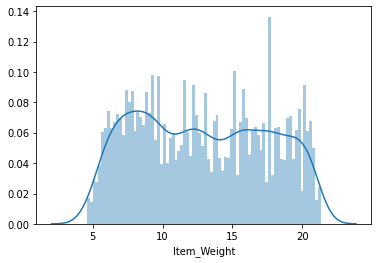

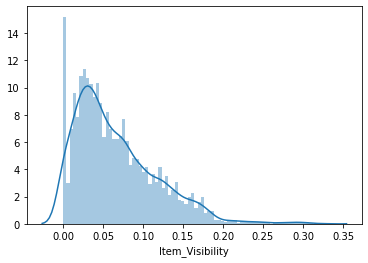

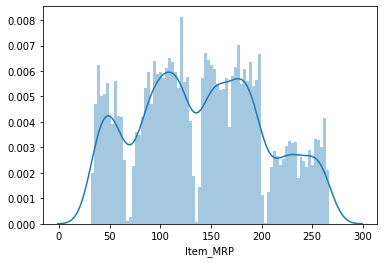

In [9]:
for col in conti:
    sns.distplot(train[col].dropna(), bins=80)
    plt.show()

Observations:
1. Distribution of weights are symmetric
2. item visiblity is right skewed
3. 4 distinct classes can be seen over MRP. 

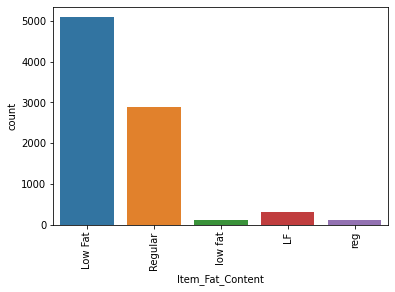

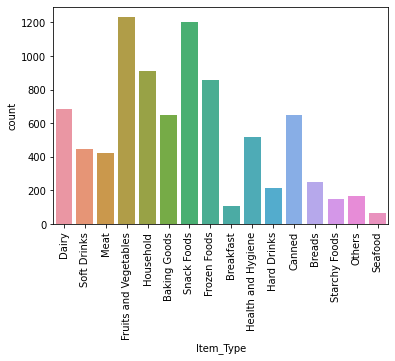

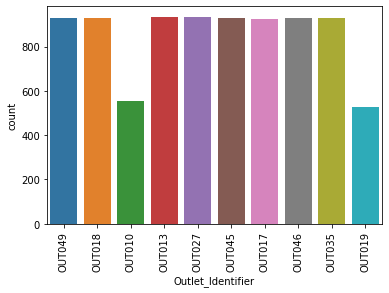

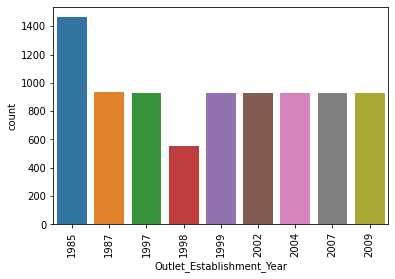

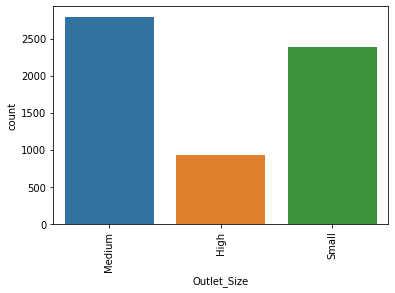

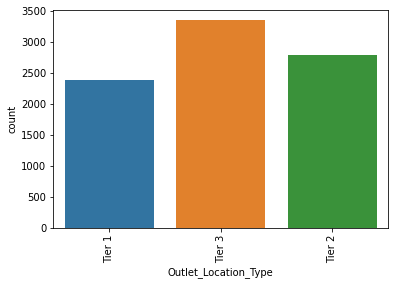

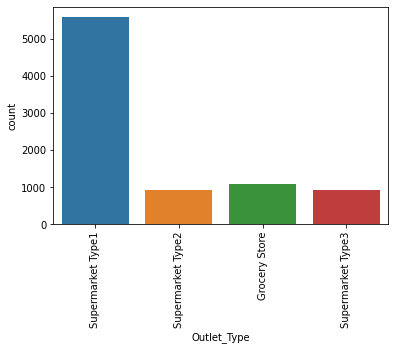

In [10]:
for col in categ:
    sns.countplot(train[col])
    plt.xticks(rotation = 90)
    plt.show()

Observations:
1. Low Fat, low fat, LF are same categories ans so the Regular and reg
2. OUT10 and OUT19 are more similar than others
3. 1985 has a hike and 1988 has drop than other years
4. SuperMarket I is a frequent Outlet type

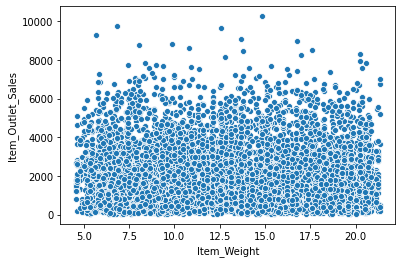

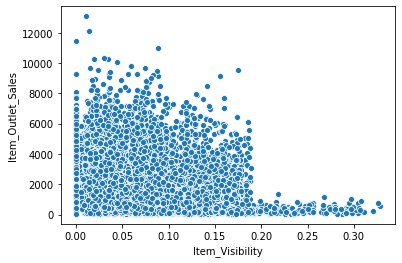

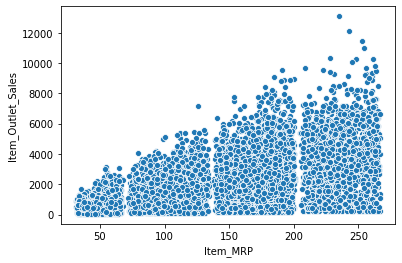

In [11]:
for cols in conti:
    sns.scatterplot(x = train[cols], y = train['Item_Outlet_Sales'])
    plt.show()

Observations:
1. we cannot have zero item visibility
2. 4 classes of MRP can be seen distinctly

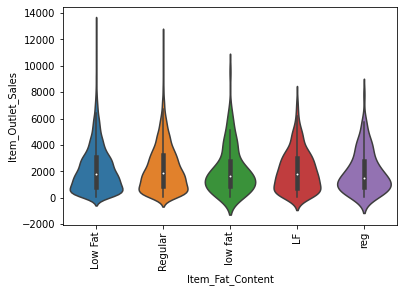

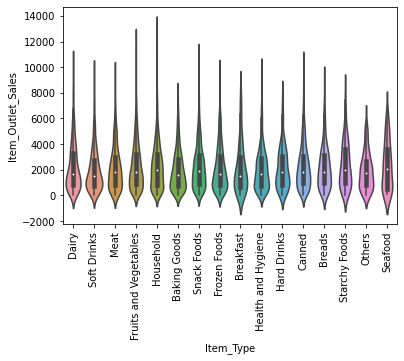

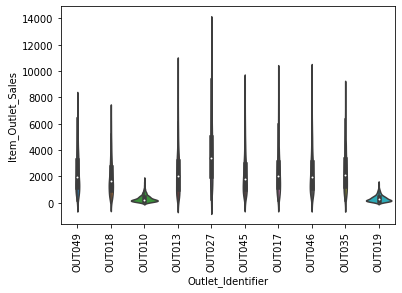

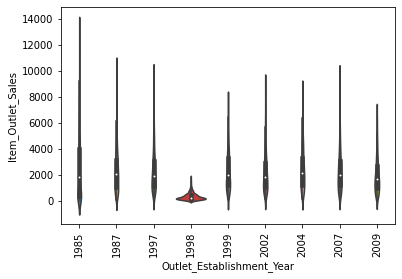

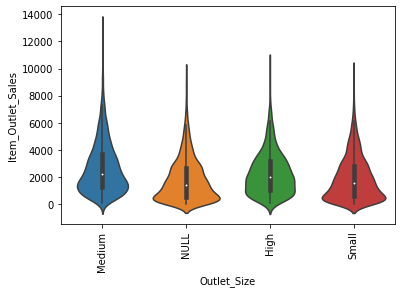

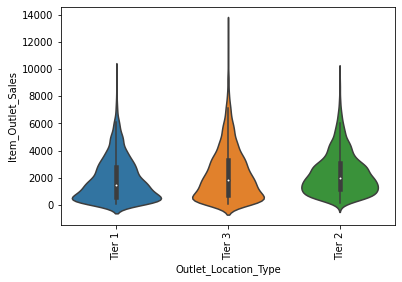

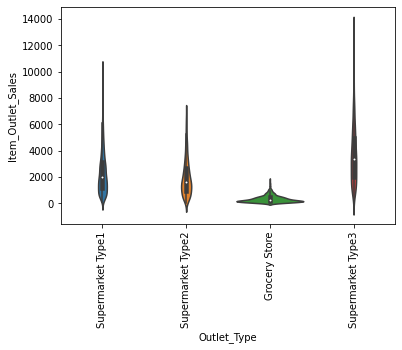

In [12]:
for cols in categ:
    sns.violinplot(x = train[cols].fillna('NULL'), y = train['Item_Outlet_Sales'])
    plt.xticks(rotation = 90)
    plt.show()

In [13]:
# Note that :

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

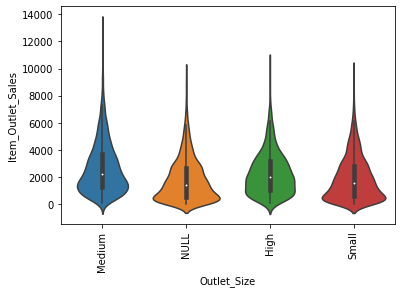

In [14]:
sns.violinplot(x = train['Outlet_Size'].fillna('NULL'), y = train['Item_Outlet_Sales'])
plt.xticks(rotation = 90)

Observations :
1. the null values have similarity with 'small' 

### Treating Missing Values

In [15]:
train['Outlet_Size'].fillna('Small', inplace = True)

In [16]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace = True)

In [17]:
print(train.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Hence, No missing values are present now!

In [18]:
test['Outlet_Size'].fillna('Small', inplace = True)
test['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace = True)

### Feature Engineering

In [19]:
row = train.shape[0]

In [20]:
df = pd.concat([train,test], sort = 'False',ignore_index=True)
df.shape

(14204, 12)

In [21]:
print(conti)
print(categ)

['Item_Weight', 'Item_Visibility', 'Item_MRP']
['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [22]:
df['Item_Visibility'].mean()

0.06595278007399345

In [23]:
for i in range(0,14204):
    if df.loc[i,'Item_Visibility']==0:
        df.loc[i,'Item_Visibility'] = 0.06595278007399345       

(array([1.050e+02, 2.670e+02, 3.340e+02, 4.430e+02, 3.650e+02, 4.970e+02,
        5.020e+02, 4.890e+02, 5.050e+02, 4.780e+02, 4.880e+02, 4.360e+02,
        4.220e+02, 4.050e+02, 3.100e+02, 3.820e+02, 3.600e+02, 2.850e+02,
        3.180e+02, 1.187e+03, 2.790e+02, 2.880e+02, 3.400e+02, 2.890e+02,
        2.370e+02, 2.130e+02, 2.270e+02, 2.400e+02, 1.910e+02, 2.130e+02,
        1.760e+02, 1.870e+02, 1.280e+02, 1.710e+02, 1.400e+02, 1.470e+02,
        1.900e+02, 1.270e+02, 1.730e+02, 1.110e+02, 1.040e+02, 1.080e+02,
        1.300e+02, 8.800e+01, 6.900e+01, 8.600e+01, 6.100e+01, 7.300e+01,
        1.170e+02, 5.800e+01, 6.600e+01, 7.400e+01, 8.800e+01, 5.000e+01,
        2.000e+01, 5.800e+01, 3.200e+01, 1.000e+01, 9.000e+00, 1.300e+01,
        8.000e+00, 1.400e+01, 6.000e+00, 1.200e+01, 1.600e+01, 1.000e+01,
        7.000e+00, 1.000e+01, 1.400e+01, 6.000e+00, 5.000e+00, 1.000e+01,
        1.100e+01, 4.000e+00, 9.000e+00, 6.000e+00, 7.000e+00, 9.000e+00,
        1.000e+00, 1.000e+00, 3.000e+0

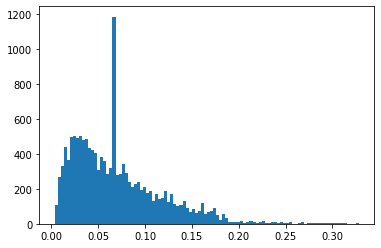

In [24]:
plt.hist(df['Item_Visibility'].dropna(), bins=100)

Generating New Columns :

In [25]:
## There is some information that can be extracted form item identifier column.
for i in range(0,14204):
    df.loc[i,'Details'] = df.loc[i, 'Item_Identifier'][:2]

In [26]:
df.Details.nunique()

3

In [27]:
for i in range(0,14204):
    df.loc[i,'Details_3'] = df.loc[i, 'Item_Identifier'][2:3]

In [28]:
df.Details_3.nunique()

26

In [29]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Details,Details_3
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,FD,A
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,DR,C
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,FD,N
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,Small,Grocery Store,FD,X
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,NC,D


In [30]:
df['Item_Fat_Content'].replace({'Low Fat':0, 'LF':0,'low fat':0,'Regular':1, 'reg':1}, inplace = True)

In [31]:
df.drop('Item_Identifier', axis=1, inplace=True)

### Labelling

In [32]:
train_data = df.loc[0:8522]
test_data = df[8523:]

In [33]:
test_data.drop('Item_Outlet_Sales', axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
X = train_data.drop('Item_Outlet_Sales', axis=1)
y = train_data['Item_Outlet_Sales']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [38]:
lab = ['Details','Details_3','Outlet_Size','Outlet_Location_Type','Outlet_Identifier']

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()
label_test_data = test_data.copy() 
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in lab:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])
    label_test_data[col] = label_encoder.transform(label_test_data[col])

In [39]:
label_X_train.head()

,Item_Fat_Content,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Details,Details_3
3288,0,39.5480,Others,0.031187,12.857645,1985,5,2,1,Supermarket Type3,2,11
2206,1,191.3846,Frozen Foods,0.076199,12.650000,2002,7,1,2,Supermarket Type1,1,17
170,0,164.8210,Others,0.019472,14.500000,2004,6,1,2,Supermarket Type1,2,12
6526,1,237.3564,Fruits and Vegetables,0.057762,12.857645,1985,5,2,1,Supermarket Type3,1,20
135,0,116.0492,Household,0.076856,7.235000,1997,8,0,2,Supermarket Type1,2,14


In [40]:
from category_encoders import CountEncoder
ce = CountEncoder()
ce.fit(label_X_train['Item_Type'])
label_X_train['Item_Type'+'_count'] = ce.transform(label_X_train['Item_Type'])
label_X_valid['Item_Type'+'_count'] = ce.transform(label_X_valid['Item_Type'])
label_test_data['Item_Type'+'_count'] = ce.transform(label_test_data['Item_Type'])

In [41]:
from category_encoders import CountEncoder
ce2 = CountEncoder()
ce2.fit(label_X_train['Outlet_Type'])
label_X_train['Outlet_Type'+'_count'] = ce2.transform(label_X_train['Outlet_Type'])
label_X_valid['Outlet_Type'+'_count'] = ce2.transform(label_X_valid['Outlet_Type'])
label_test_data['Outlet_Type'+'_count'] = ce2.transform(label_test_data['Outlet_Type'])

In [42]:
label_X_train.drop(['Outlet_Type', 'Item_Type'], axis=1, inplace=True)
label_X_valid.drop(['Outlet_Type', 'Item_Type'], axis=1, inplace=True)
label_test_data.drop(['Outlet_Type', 'Item_Type'], axis=1, inplace=True)

Hence now we have finished our EDA. Now its turn for transformation of the data

In [43]:
# Removing right skewness of ITEM-VISBILITY 
label_X_train['Item_Visibility'] = np.log(label_X_train['Item_Visibility'] + 1)

In [44]:
label_X_valid['Item_Visibility'] = np.log(label_X_valid['Item_Visibility'] + 1)

In [45]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(label_X_train)

X_train_scaled = pd.DataFrame(scaler.transform(label_X_train),columns=label_X_train.columns)
X_valid_scaled = pd.DataFrame(scaler.transform(label_X_valid),columns=label_X_valid.columns)
X_test_scaled = pd.DataFrame(scaler.transform(label_test_data),columns=label_test_data.columns)

Completed!
We have normalized our data, Now its turn for predictions -

## Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model = LinearRegression()
print('Training Model!')
lr_model.fit(X_train_scaled, y_train)
pred = lr_model.predict(X_valid_scaled)
print(mean_squared_error(y_valid, pred))

Training Model!
1526251.6212575827


## Random-Forests

In [47]:
from sklearn.ensemble import RandomForestRegressor
tree_model = RandomForestRegressor()
print('Training Model!')
tree_model.fit(X_train_scaled, y_train)
pred = tree_model.predict(X_valid_scaled)
print(mean_squared_error(y_valid, pred))

Training Model!
1246738.1267594805


## XG_Boost

In [48]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
print('Training Model!')
xgb_model.fit(X_train_scaled, y_train)
pred = xgb_model.predict(X_valid_scaled)
print(mean_squared_error(y_valid, pred))

Training Model!
1296893.731862456


Here we can see Random forest works a little better, hence we will optimize this model by tuning para meters :

## Parameter Tuning for Random Forests

In [49]:
estimator = range(50, 500, 50)

In [50]:
tune = {}
for n in estimator:
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train_scaled,y_train)
    pre = model.predict(X_valid_scaled)
    tune[n] = mean_squared_error(y_valid, pre)
    

In [51]:
keys = list(tune.keys())
values = list(tune.values())

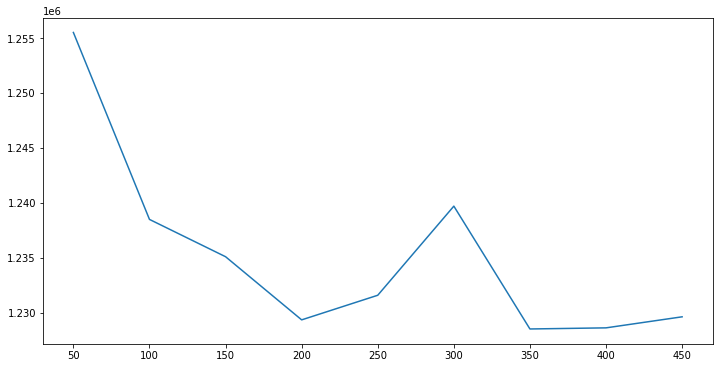

In [52]:
plt.figure(figsize=(12,6))
sns.lineplot(keys, values)

we will set n_estimators as 400.

In [53]:
from sklearn.ensemble import RandomForestRegressor
tree_model = RandomForestRegressor(n_estimators=400)
print('Training Model!')
tree_model.fit(X_train_scaled, y_train)
pred = tree_model.predict(X_valid_scaled)
print(mean_squared_error(y_valid, pred))

Training Model!
1230315.5341541106


## Parameter Tuning for XG_Boost :

In [54]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train_scaled, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid_scaled, y_valid)], 
             verbose=False)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [55]:
pred = my_model.predict(X_valid_scaled)
print(mean_squared_error(y_valid, pred))

1123569.7118867275


Hence, We can see here our error has dropped drastically!